## Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from tensorflow import keras
from tensorflow.keras import layers

## Data loading

In [ ]:
df=pd.read_csv('final_customers_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,05-08-2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09-11-2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24-10-2021,Kanyon


In [ ]:
df.shape

(99500, 10)

## Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99500 entries, 0 to 99499
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99500 non-null  object 
 1   customer_id     99500 non-null  object 
 2   gender          99500 non-null  object 
 3   age             99500 non-null  int64  
 4   category        99500 non-null  object 
 5   quantity        99500 non-null  int64  
 6   price           99500 non-null  float64
 7   payment_method  99500 non-null  object 
 8   invoice_date    99500 non-null  object 
 9   shopping_mall   99500 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [ ]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [ ]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

<ipython-input-6-4859ed234816>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['invoice_date'] = pd.to_datetime(df['invoice_date'])


In [ ]:
# Feature Engineering

df['sales'] = df['price'] * df['quantity']
df['date'] = df['invoice_date'].dt.day
df['year'] = df['invoice_date'].dt.year
df['month'] = df['invoice_date'].dt.month

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99500 entries, 0 to 99499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99500 non-null  object        
 1   customer_id     99500 non-null  object        
 2   gender          99500 non-null  object        
 3   age             99500 non-null  int64         
 4   category        99500 non-null  object        
 5   quantity        99500 non-null  int64         
 6   price           99500 non-null  float64       
 7   payment_method  99500 non-null  object        
 8   invoice_date    99500 non-null  datetime64[ns]
 9   shopping_mall   99500 non-null  object        
 10  sales           99500 non-null  float64       
 11  date            99500 non-null  int64         
 12  year            99500 non-null  int64         
 13  month           99500 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)


In [ ]:
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

In [ ]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

In [ ]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sales,date,year,month
0,I138884,C241288,0,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,8,2022,5
1,I317333,C111565,1,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,12,2021,12
2,I127801,C266599,1,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08,11,2021,9
3,I173702,C988172,0,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,16,2021,5
4,I337046,C189076,0,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,24,2021,10


0 Represent Female and 1 Represent Male

In [ ]:
df['price'] = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min())

In [ ]:
z_scores = stats.zscore(df['price'])
df = df[(z_scores < 3)]

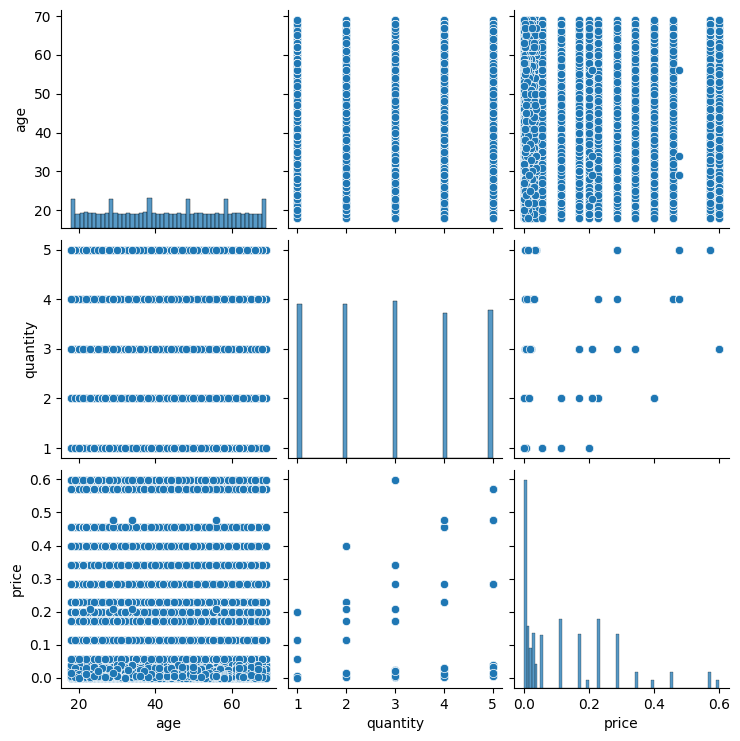

In [ ]:
sns.pairplot(df[['age', 'quantity', 'price']])
plt.show()

In [ ]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sales,date,year,month
0,I138884,C241288,0,28,Clothing,5,0.285078,Credit Card,2022-05-08,Kanyon,7502.00,8,2022,5
1,I317333,C111565,1,21,Shoes,3,0.342299,Debit Card,2021-12-12,Forum Istanbul,5401.53,12,2021,12
2,I127801,C266599,1,20,Clothing,1,0.056218,Cash,2021-09-11,Metrocity,300.08,11,2021,9
3,I173702,C988172,0,66,Shoes,5,0.571163,Credit Card,2021-05-16,Metropol AVM,15004.25,16,2021,5
4,I337046,C189076,0,53,Books,4,0.010557,Cash,2021-10-24,Kanyon,242.40,24,2021,10


## EDA

In [ ]:
df.describe()

,gender,age,quantity,price,sales,date,year,month
count,97498.000000,97498.000000,97498.000000,97498.000000,97498.000000,97498.000000,97498.000000,97498.000000
mean,0.402049,43.418962,2.972666,0.114641,2139.169486,15.400942,2021.629049,6.280949
std,0.490314,14.994028,1.409114,0.142304,3189.919306,8.995867,0.635965,3.517994
min,0.000000,18.000000,1.000000,0.000000,5.230000,1.000000,2021.000000,1.000000
25%,0.000000,30.000000,2.000000,0.006755,130.750000,7.000000,2021.000000,3.000000
50%,0.000000,43.000000,3.000000,0.037765,573.440000,16.000000,2022.000000,6.000000
75%,1.000000,56.000000,4.000000,0.199202,2700.720000,23.000000,2022.000000,9.000000
max,1.000000,69.000000,5.000000,0.599601,15004.250000,31.000000,2023.000000,12.000000


* Gender: The dataset consists of binary gender values (0 and 1), with a slight majority of one gender (mean ≈ 0.402).

* Age: The average age of customers is around 43.42 years, ranging from 18 to 69 years, with moderate age variability.

* Quantity: On average, each transaction involves approximately 2.97 items, with a range of 1 to 5 items per transaction.

* Price: The average item price is around 0.115, with moderate price variability, ranging from 0 to 0.599601.

* Sales: The average sales amount is approximately 2,139.17, with substantial variation, ranging from 5.23 to 15,004.25.

* Date: The dataset includes transaction dates with a mean of approximately 15.40 (likely representing the day of the month) and ranges from January (1) to December (12).

* Year: Transactions span from 2021 to 2023, with the majority occurring in 2022 (median year ≈ 2022).

In [ ]:
print(df['gender'].value_counts())
print("--------------------------")
print(df['category'].value_counts())
print("--------------------------")
print(df['payment_method'].value_counts())
print("--------------------------")
print(df['shopping_mall'].value_counts())

0    58299
1    39199
Name: gender, dtype: int64
--------------------------
Clothing           34505
Cosmetics          15102
Food & Beverage    14779
Toys               10088
Shoes              10044
Souvenir            4999
Books               4987
Technology          2994
Name: category, dtype: int64
--------------------------
Cash           43562
Credit Card    34247
Debit Card     19689
Name: payment_method, dtype: int64
--------------------------
Mall of Istanbul     19545
Kanyon               19415
Metrocity            14727
Metropol AVM          9982
Istinye Park          9597
Zorlu Center          4970
Cevahir AVM           4888
Forum Istanbul        4866
Viaport Outlet        4804
Emaar Square Mall     4704
Name: shopping_mall, dtype: int64


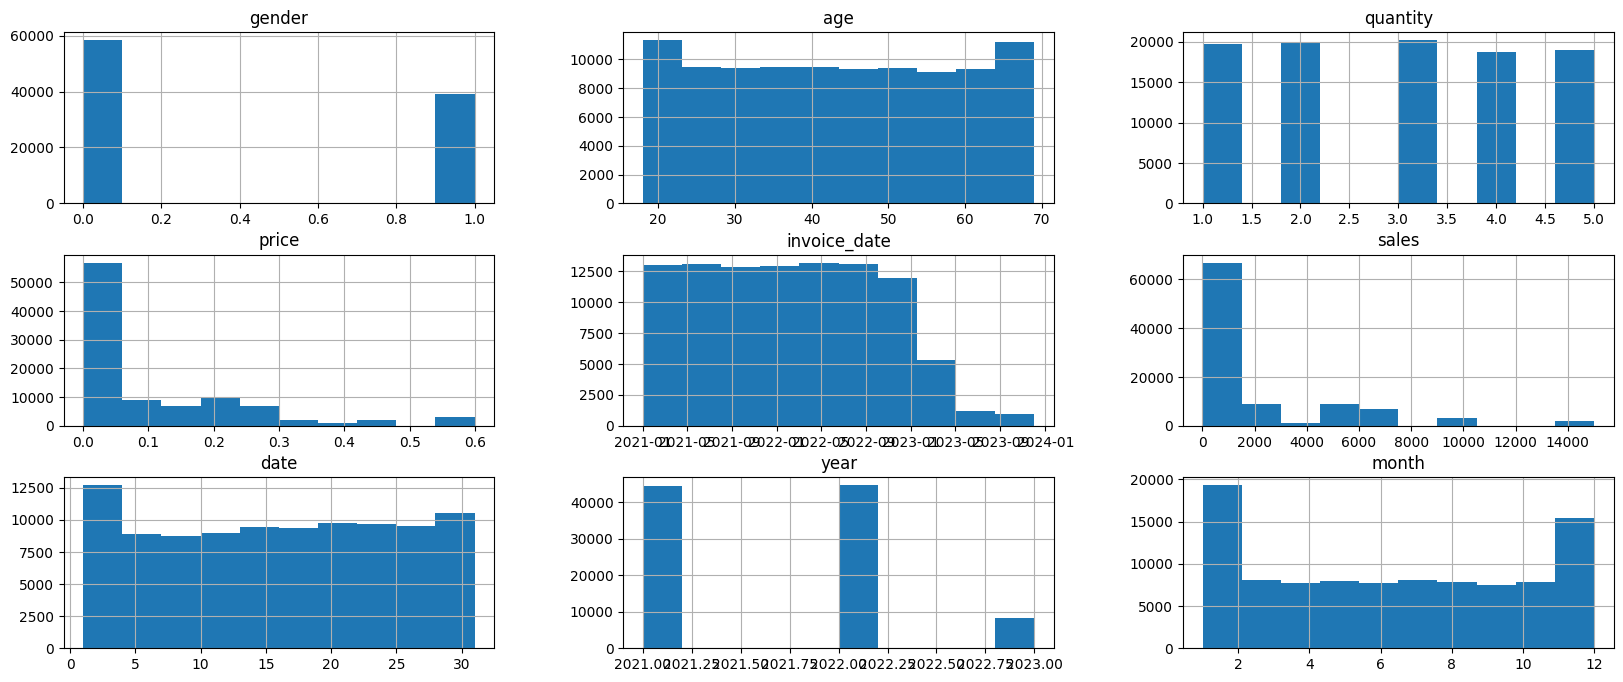

In [ ]:
df.hist(bins=10, figsize=(20, 8))
plt.show()

<ipython-input-19-2aa64a835cb7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


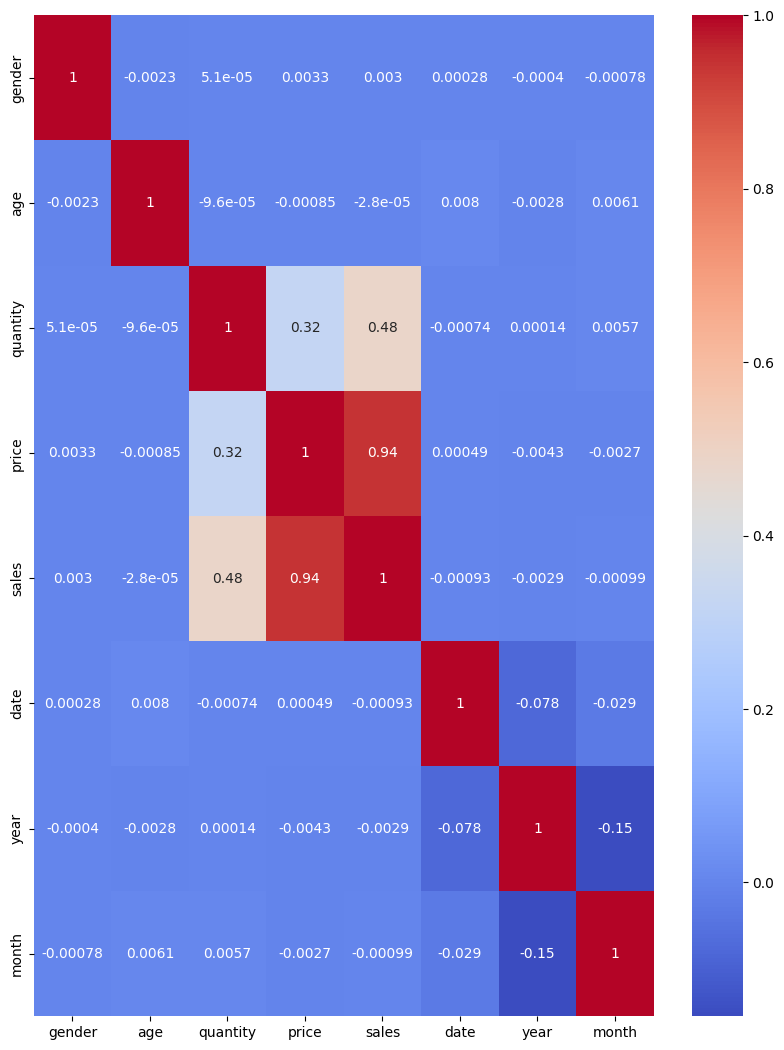

In [ ]:
plt.figure(figsize=(10, 13))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

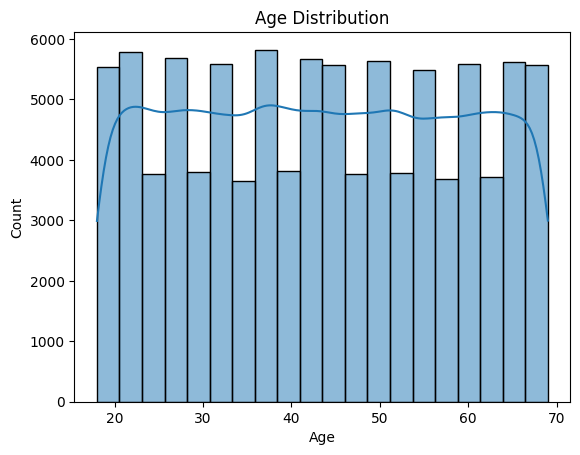

In [ ]:
sns.histplot(df['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

* At age of 39 we observe more purchasing count and second highest age of purchasing is at 22

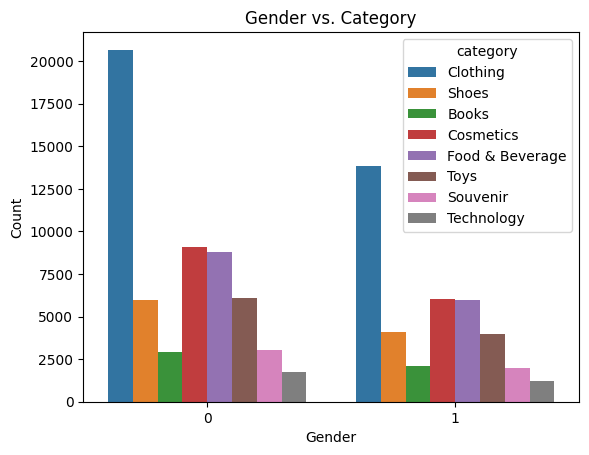

In [ ]:
sns.countplot(x='gender', hue='category', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs. Category')
plt.show()

The top 3 product category purchasing more by both males and females are
* clothing
* cosmetics
* Food & Beverage

Most of the purchasing done by Female customers

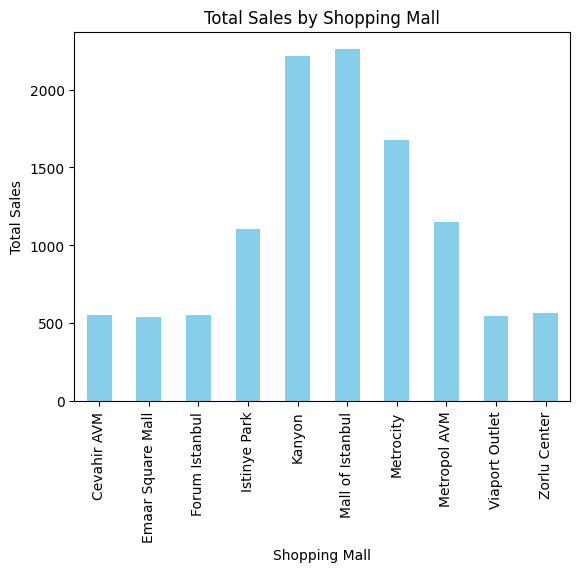

In [ ]:
total_sales_by_mall = df.groupby('shopping_mall')['price'].sum()
total_sales_by_mall.plot(kind='bar', color='skyblue')
plt.xlabel('Shopping Mall')
plt.ylabel('Total Sales')
plt.title('Total Sales by Shopping Mall')
plt.show()

In [ ]:
mall_product_sales = df[df['shopping_mall'] == 'Mall of Istanbul'].groupby(['shopping_mall', 'category'])['sales'].sum()
highest_sales_product = mall_product_sales.idxmax()
print(f"The highest sales product in {'Mall of Istanbul'} is {highest_sales_product[1]} with total sales of {mall_product_sales.max()} .")

The highest sales product in Mall of Istanbul is Clothing with total sales of 22954019.44 .


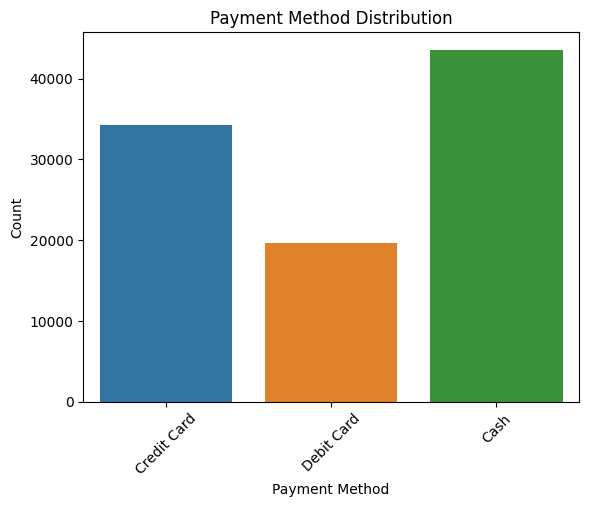

In [ ]:
sns.countplot(x='payment_method', data=df)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Payment Method Distribution')
plt.xticks(rotation=45)
plt.show()

Most of the purchasing transactions are made by cash only

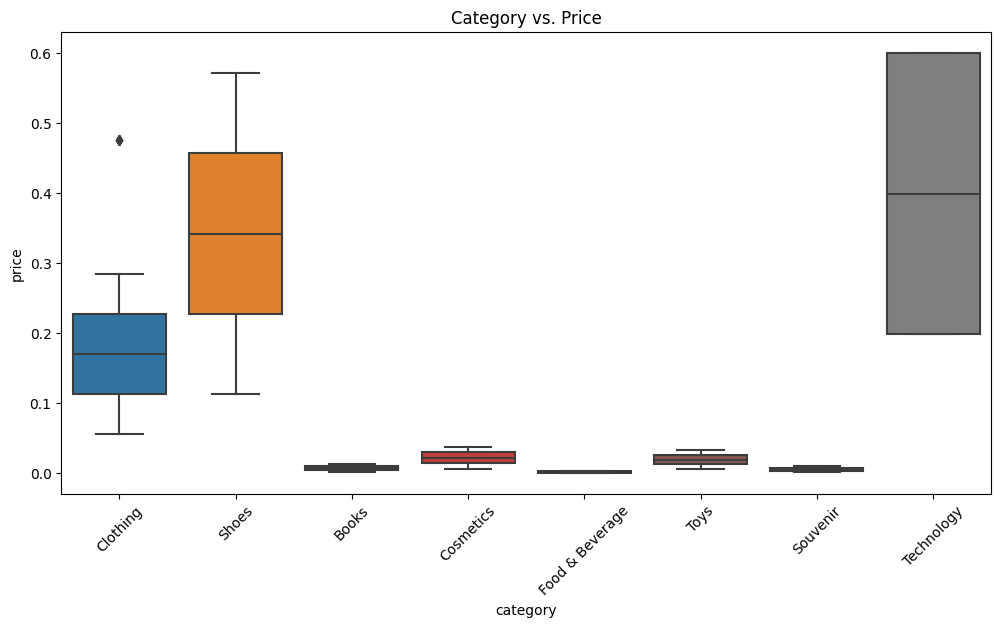

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='price', data=df)
plt.xticks(rotation=45)
plt.title('Category vs. Price')
plt.show()

In [ ]:
desired_month=5
filtered_df = df[df['month'] == desired_month]
filtered_df.shape
#user_id_counts = filtered_df['customer_id'].value_counts()

(7971, 14)

In [ ]:
df['customer_id'].value_counts()

C241288    3
C111565    3
C222333    3
C777888    3
C120797    2
          ..
C277257    1
C161117    1
C372177    1
C193352    1
C666666    1
Name: customer_id, Length: 97461, dtype: int64

In [ ]:
customer_monthly_purchase_counts = df.groupby(['customer_id', 'year', 'month']).size().reset_index(name='purchase_count')
customer_monthly_purchase_counts

,customer_id,year,month,purchase_count
0,C100004,2021,11,1
1,C100005,2023,3,1
2,C100006,2022,1,1
3,C100012,2021,8,1
4,C100019,2021,7,1
...,...,...,...,...
97468,C999886,2023,8,1
97469,C999910,2022,5,1
97470,C999974,2022,10,1
97471,C999976,2022,6,1


In [ ]:
repeated_customers = customer_monthly_purchase_counts[customer_monthly_purchase_counts['purchase_count'] > 1]
repeated_customers

,customer_id,year,month,purchase_count
3568,C111565,2021,12,3
3828,C112481,2021,11,2
4727,C115505,2022,7,2
6333,C120797,2021,4,2
17849,C158247,2021,2,2
21579,C170410,2022,3,2
22928,C174818,2021,2,2
27274,C189076,2021,10,2
35112,C214370,2023,1,2
42323,C238286,2021,2,2


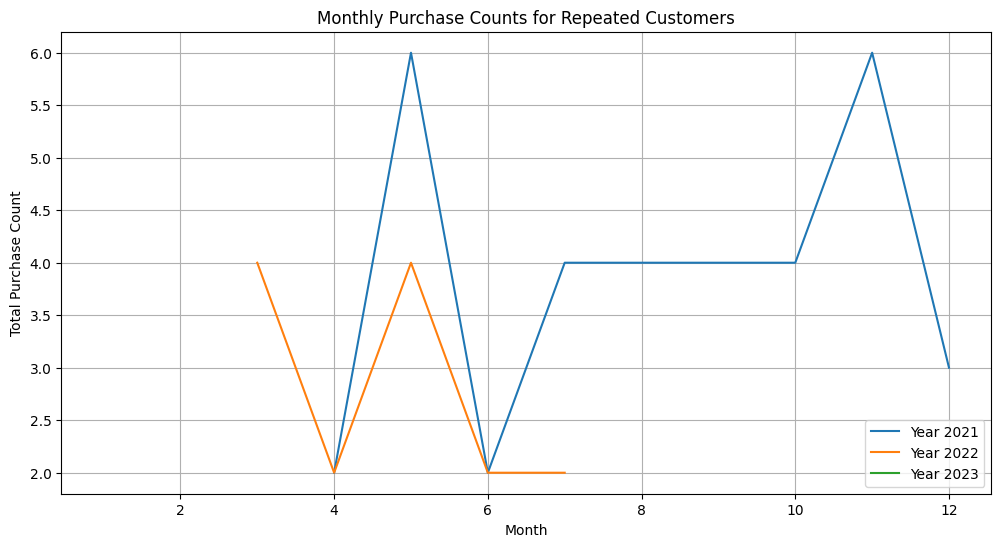

In [ ]:
import matplotlib.pyplot as plt

monthly_counts = repeated_customers.groupby(['year', 'month'])['purchase_count'].sum().unstack()

plt.figure(figsize=(12, 6))
for year in monthly_counts.index:
    plt.plot(monthly_counts.columns, monthly_counts.loc[year], label=f'Year {year}')

plt.xlabel('Month')
plt.ylabel('Total Purchase Count')
plt.title('Monthly Purchase Counts for Repeated Customers')
plt.legend()
plt.grid(True)

plt.show()

* On 5th month of year 2021 the purchasing count of repeated customers is more it falls down for next few months and again it raises on 11th month of the year 2021
(purchasing count is 6)

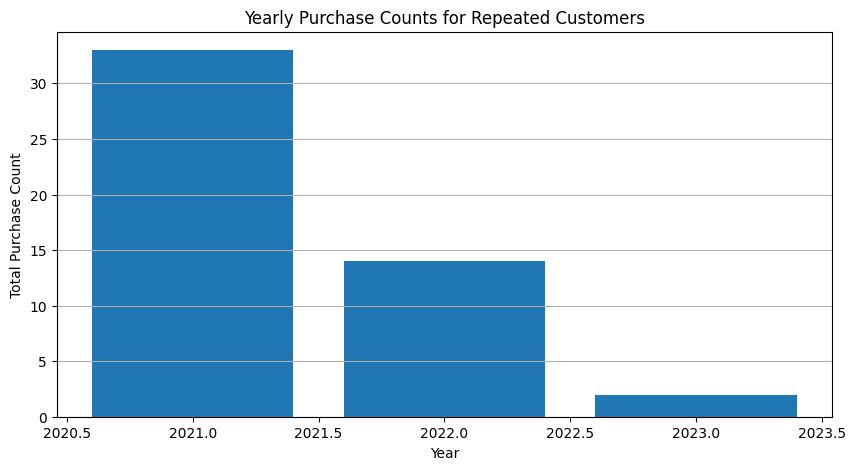

In [ ]:
yearly_counts = repeated_customers.groupby('year')['purchase_count'].sum()

plt.figure(figsize=(10, 5))
plt.bar(yearly_counts.index, yearly_counts.values)

plt.xlabel('Year')
plt.ylabel('Total Purchase Count')
plt.title('Yearly Purchase Counts for Repeated Customers')
plt.grid(axis='y')

plt.show()

*  At 2021 year more repeated customers are purchasing the products, purchasing count is 35
* At 2022 year the purchasing count is decreased to 14
* At 2023 year the purchasing count is decreased to 3

In [ ]:
returning_customer_count = repeated_customers['customer_id'].nunique()
print(f"Total returning customers over the years: {returning_customer_count}")

Total returning customers over the years: 24


In [ ]:
total_customers = len(df['customer_id'].unique())
returning_customers_count = repeated_customers['customer_id'].count()

percentage_returning_customers = (returning_customers_count / total_customers) * 100
print(f"Percentage of returning customers over the years: {percentage_returning_customers:.2f}%")

Percentage of returning customers over the years: 0.02%


Outof 100%, 0.02% customers are repeated customers for purchasing products

## Model Building

In [ ]:
data = pd.get_dummies(df, columns=['gender', 'category', 'payment_method'], drop_first=True)
data.head()

,invoice_no,customer_id,age,quantity,price,invoice_date,shopping_mall,sales,date,year,...,gender_1,category_Clothing,category_Cosmetics,category_Food & Beverage,category_Shoes,category_Souvenir,category_Technology,category_Toys,payment_method_Credit Card,payment_method_Debit Card
0,I138884,C241288,28,5,0.285078,2022-05-08,Kanyon,7502.00,8,2022,...,0,1,0,0,0,0,0,0,1,0
1,I317333,C111565,21,3,0.342299,2021-12-12,Forum Istanbul,5401.53,12,2021,...,1,0,0,0,1,0,0,0,0,1
2,I127801,C266599,20,1,0.056218,2021-09-11,Metrocity,300.08,11,2021,...,1,1,0,0,0,0,0,0,0,0
3,I173702,C988172,66,5,0.571163,2021-05-16,Metropol AVM,15004.25,16,2021,...,0,0,0,0,1,0,0,0,1,0
4,I337046,C189076,53,4,0.010557,2021-10-24,Kanyon,242.40,24,2021,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = data.drop(['invoice_no', 'customer_id', 'invoice_date', 'shopping_mall'],axis=1)
y = data['sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,age,quantity,price,sales,date,year,month,gender_1,category_Clothing,category_Cosmetics,category_Food & Beverage,category_Shoes,category_Souvenir,category_Technology,category_Toys,payment_method_Credit Card,payment_method_Debit Card
67666,68,1,0.113435,600.17,16,2022,8,1,0,0,0,1,0,0,0,1,0
55290,31,5,0.285078,7502.00,25,2022,10,0,1,0,0,0,0,0,0,1,0
31457,24,4,0.007949,187.68,14,2022,1,0,0,0,0,0,1,0,0,1,0
58879,22,2,0.227867,2400.68,2,2023,6,1,0,0,0,1,0,0,0,1,0
86401,54,2,0.014508,162.64,2,2021,1,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,29,2,0.113433,1200.32,12,2021,10,1,1,0,0,0,0,0,0,0,0
56001,66,2,0.227867,2400.68,18,2022,10,1,0,0,0,1,0,0,0,1,0
78408,45,2,0.399402,4200.00,21,2021,4,0,0,0,0,0,0,1,0,0,0
878,55,4,0.227863,4801.28,5,2021,12,0,1,0,0,0,0,0,0,1,0


In [ ]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 300.07996 ,   11.729987,   83.68    , ..., 1016.50006 ,
        650.55994 , 1016.50006 ], dtype=float32)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R^2): {r2:.2f}")

Mean Absolute Error: 0.61
Root Mean Squared Error: 46.02
R-squared (R^2): 1.00


In [ ]:
## Hypertuning

model_fine = XGBRegressor(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    objective='reg:squarederror',
    random_state=42
)

model_fine.fit(X_train, y_train)

y_pred = model_fine.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Metrics after Hyper tuning ")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R^2): {r2:.2f}")

Metrics after Hyper tuning 
Mean Absolute Error: 0.59
Root Mean Squared Error: 21.38
R-squared (R^2): 1.00


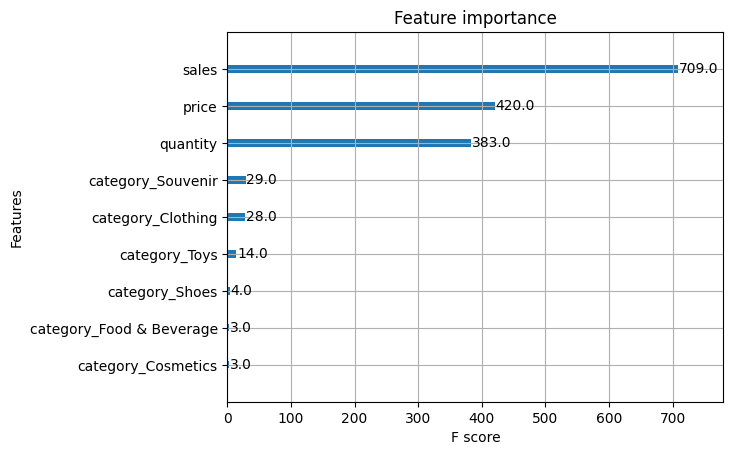

In [ ]:
## Model Interpritation

from xgboost import plot_importance

plot_importance(model)
plt.show()

In [ ]:
!pip install pycaret
!pip install --upgrade pycaret scikit-learn scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 24.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 85.7 MB/s

In [ ]:
from pycaret.regression import *

setup(data, target='sales', ignore_features=['invoice_no', 'customer_id', 'invoice_date','shopping_mall'])

,Description,Value
0,Session id,2551
1,Target,sales
2,Target type,Regression
3,Original data shape,"(97498, 21)"
4,Transformed data shape,"(97498, 17)"
5,Transformed train set shape,"(68248, 17)"
6,Transformed test set shape,"(29250, 17)"
7,Ignore features,4
8,Numeric features,16
9,Preprocess,True


In [ ]:
best_models = compare_models(n_select=2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.0560,70.6660,4.6039,1.0000,0.0014,0.0000,0.1280
gbr,Gradient Boosting Regressor,4.7691,125.5474,9.8932,1.0000,0.1787,0.0584,4.2760
lightgbm,Light Gradient Boosting Machine,0.6026,279.5373,12.8386,1.0000,0.0132,0.0045,1.8910
xgboost,Extreme Gradient Boosting,0.0445,41.6414,3.6384,1.0000,0.0018,0.0000,0.4910
rf,Random Forest Regressor,0.0747,47.6496,5.3236,1.0000,0.0016,0.0000,5.5760
et,Extra Trees Regressor,0.0283,22.5897,2.2986,1.0000,0.0005,0.0000,4.4380
ada,AdaBoost Regressor,274.6820,112502.8182,333.5602,0.9890,1.3644,5.2151,3.0500
ridge,Ridge Regression,348.2012,274098.7735,523.5111,0.9732,0.8079,1.6789,0.1380
br,Bayesian Ridge,345.3397,274005.5133,523.4208,0.9732,0.7550,1.5525,0.0850
lr,Linear Regression,345.3268,274005.5216,523.4208,0.9732,0.7547,1.5518,1.0530


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

Top 2 models are Decision Tree Regressor and Gradient Boosting Regressor which have more performance

### Deep Learning

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model for regression
dmodel = keras.Sequential()
dmodel.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
dmodel.add(layers.Dense(32, activation='relu'))
dmodel.add(layers.Dense(1) ) # Output layer with one neuron for regression

# Compile the model
dmodel.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
dmodel.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = dmodel.evaluate(X_test, y_test)
print(f'Test mean squared error: {loss:.2f}')

Epoch 1/10
1950/1950 [==============================] - 12s 5ms/step - loss: 2860437.5000 - val_loss: 68527.4688
Epoch 2/10
1950/1950 [==============================] - 6s 3ms/step - loss: 34951.9062 - val_loss: 13355.9072
Epoch 3/10
1950/1950 [==============================] - 7s 4ms/step - loss: 7976.3018 - val_loss: 4146.1484
Epoch 4/10
1950/1950 [==============================] - 8s 4ms/step - loss: 2270.4661 - val_loss: 1167.8789
Epoch 5/10
1950/1950 [==============================] - 8s 4ms/step - loss: 592.6867 - val_loss: 255.0332
Epoch 6/10
1950/1950 [==============================] - 7s 4ms/step - loss: 143.2398 - val_loss: 71.7609
Epoch 7/10
1950/1950 [==============================] - 7s 3ms/step - loss: 43.3697 - val_loss: 24.9465
Epoch 8/10
1950/1950 [==============================] - 8s 4ms/step - loss: 19.5985 - val_loss: 11.2922
Epoch 9/10
1950/1950 [==============================] - 6s 3ms/step - loss: 13.8810 - val_loss: 14.9511
Epoch 10/10
610/610 [=================

### With different final_estimators

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, RegressorMixin

class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)


keras_regressor = KerasRegressorWrapper(dmodel)
base_models = [('XGBoost', model_fine), ('DecisionTreeRegressor', best_models[0]), ('GradientBoostingRegressor', best_models[1]),('DeepLearning',keras_regressor)]

final_estimators = [LinearRegression(), Lasso(), Ridge()]

for final_estimator in final_estimators:
    stacked_model = StackingRegressor(estimators=base_models, final_estimator=final_estimator)

    stacked_model.fit(X_train, y_train)

    y_pred = stacked_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Final Estimator: {final_estimator}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")
    print("-----------------------------------")


610/610 [==============================] - 1s 2ms/step
Final Estimator: LinearRegression()
Mean Squared Error (MSE): 30.537128897098764
R-squared (R2): 0.9999969806086632
-----------------------------------
610/610 [==============================] - 1s 2ms/step
Final Estimator: Lasso()
Mean Squared Error (MSE): 457.51986762497995
R-squared (R2): 0.9999547622329072
-----------------------------------
610/610 [==============================] - 1s 2ms/step
Final Estimator: Ridge()
Mean Squared Error (MSE): 48.499820135154785
R-squared (R2): 0.999995204528322
-----------------------------------


The highest R2 value is achieved by "LinearRegression()" with an R2 of 0.9999699.

Based on both MSE and R2 values, "LinearRegression()" is the best final estimator, as it has the lowest MSE and the highest R2 value.

In [ ]:
base_models = [('XGBoost', model_fine), ('DecisionTreeRegressor', best_models[0]), ('GradientBoostingRegressor', best_models[1]),('DeepLearning',keras_regressor)]
stacked_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

stacked_model.fit(X_train, y_train)

488/488 [==============================] - 1s 2ms/step


StackingRegressor(estimators=[('XGBoost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learnin...
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                              ('DecisionTreeRegressor',
                               DecisionTreeRegressor(random_state=2551)),
                              ('GradientBoostingRegressor',
                               GradientBoostingRegressor(random_state=2551)),
                              ('DeepLearning',
                               KerasRegressorWrapper(model=<keras.src.engine.sequential.Sequential object at 0x7e33cbb8d540>))],
                  final_estimator=LinearRegression())

In [ ]:
y_pred = stacked_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

610/610 [==============================] - 1s 2ms/step
Mean Squared Error (MSE): 73.97421036883826
R-squared (R2): 0.9999926857206947


The stacked ensemble model, composed of XGBoost, DecisionTreeRegressor, GradientBoostingRegressor and keras resgressor as base models, and a LinearRegression final estimator, performs exceptionally well on the test data. The low MSE and high R2 values indicate that the model's predictions closely match the actual values and effectively capture the variance in the data, making it a strong candidate for making accurate predictions

### Save Model

In [ ]:
import joblib

joblib.dump(stacked_model, 'stacked_model.pkl')

['stacked_model.pkl']